# Exploratory Data Analysis & Intro

## Goal
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [7]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Exploratory Data Analysis for all Data Roles

#### Roles to Explore

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()
df_plot = df_plot.reset_index()

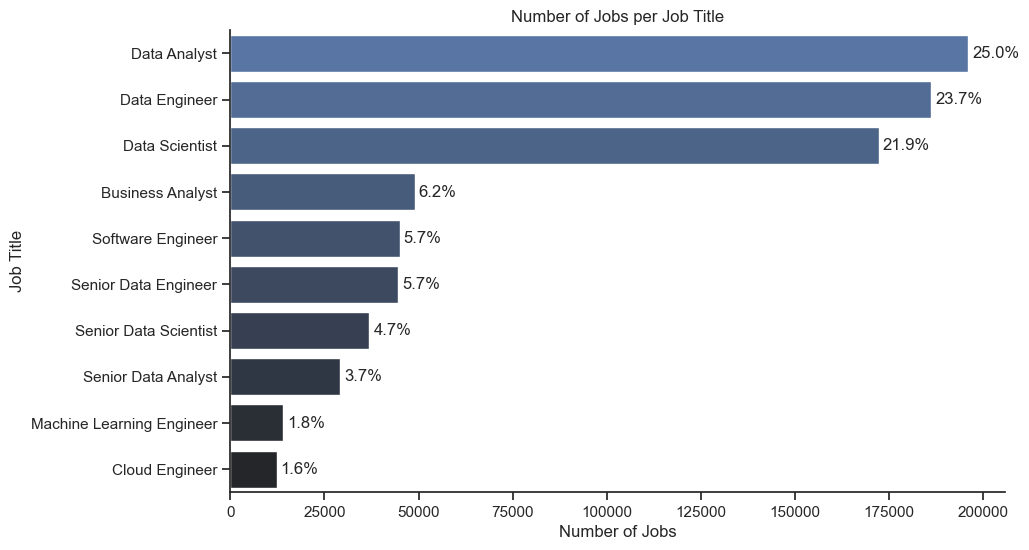

In [6]:
# Plotting with Seaborn
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.barplot(data=df_plot, x='count', y='job_title_short', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')

# Add percentages to the bars
total = df_plot['count'].sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 1000
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.show()

#### Countries to Explore

In [21]:
df_plot = df['job_country'].value_counts().to_frame().head(10)
df_plot = df_plot.reset_index()

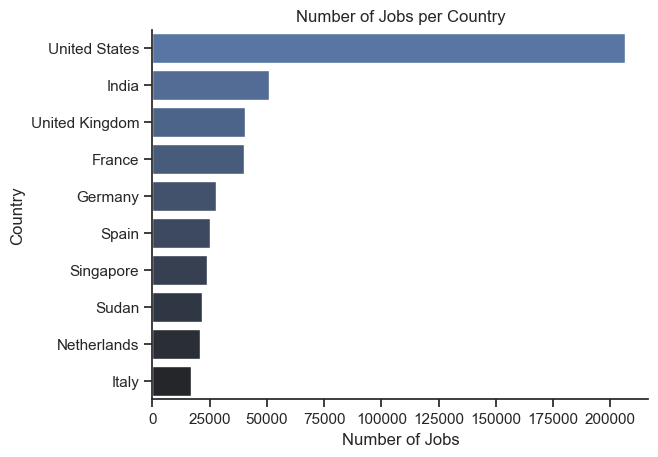

In [16]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.show()

#### Job Opportunities

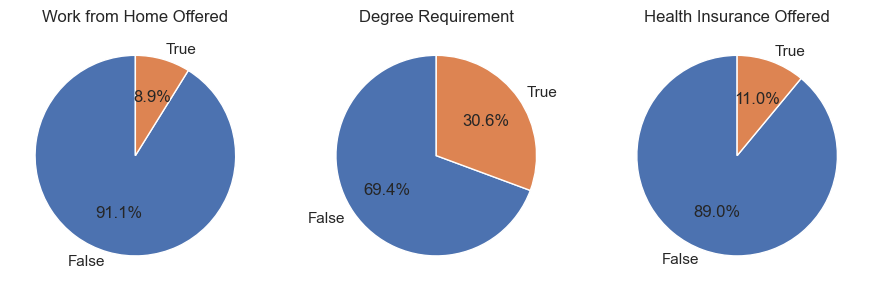

In [17]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

### Exploratory Data Analysis for Data Analysts in the US

In [19]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

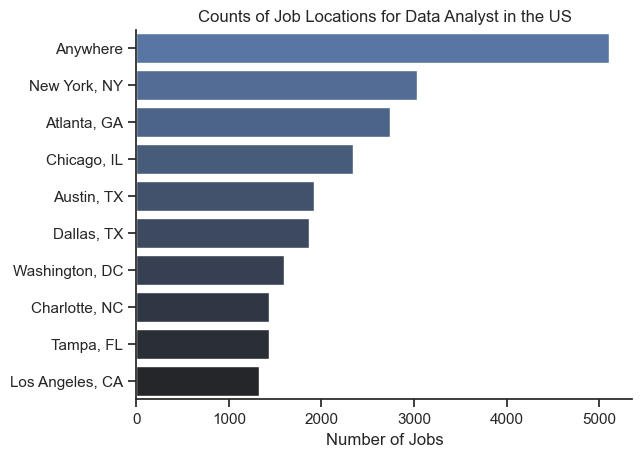

In [24]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot = df_plot.reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b_r')
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Job Opportunities

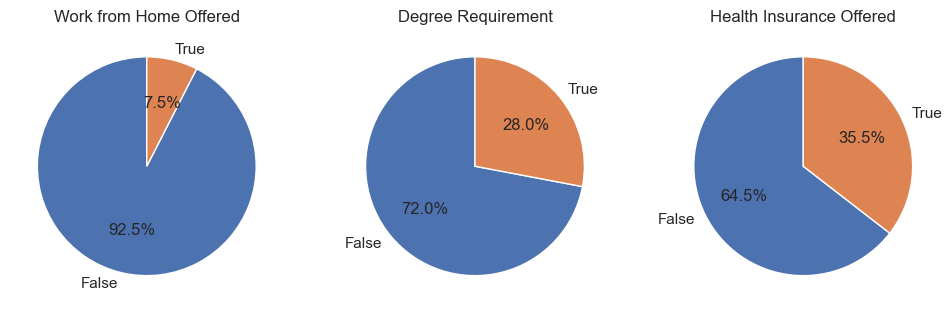

In [25]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()